<a href="https://colab.research.google.com/github/lekhya-12/AIML-IIITH-2023/blob/main/AIML_Module_1_Lab_1_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 1
# Extracting features from data





In [79]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [80]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [81]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [82]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [83]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [84]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [85]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

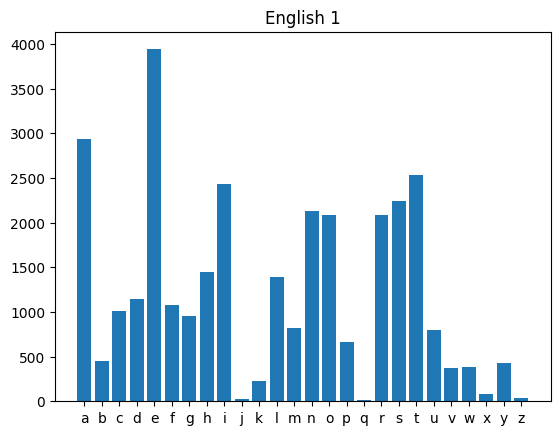

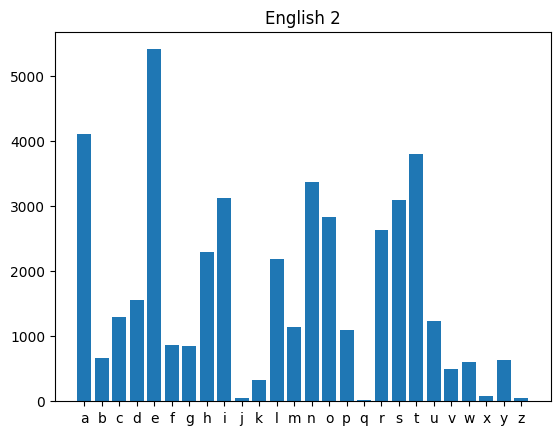

In [86]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

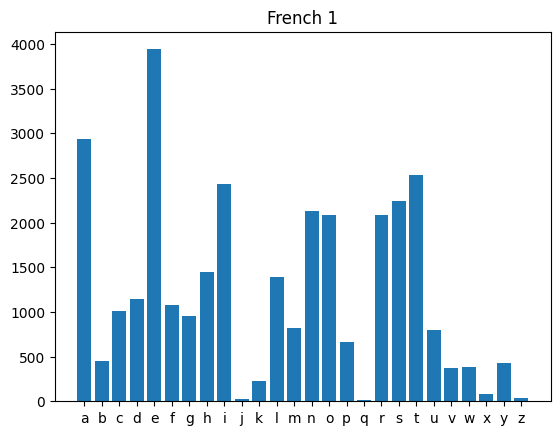

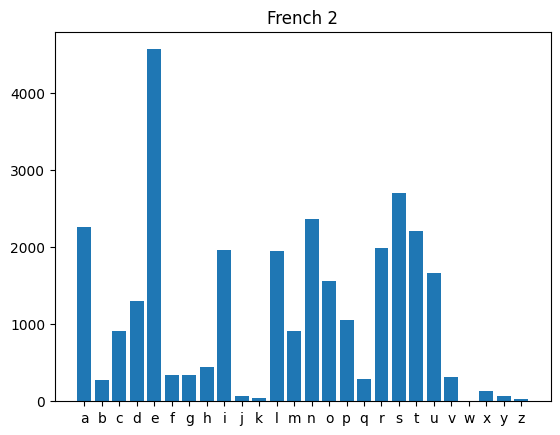

In [87]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

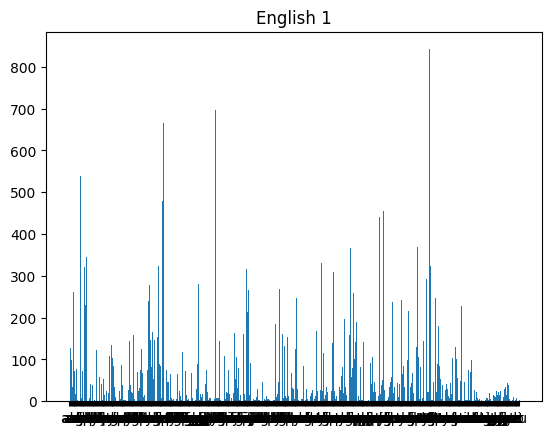

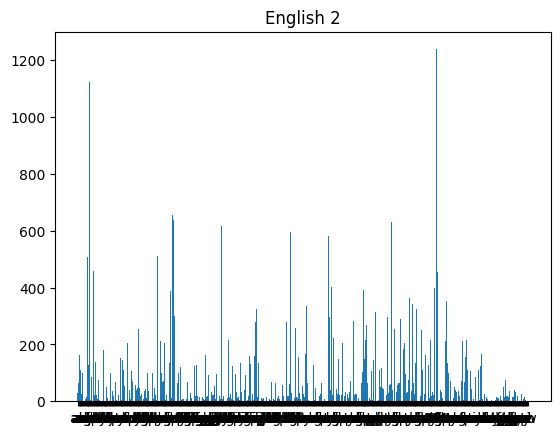

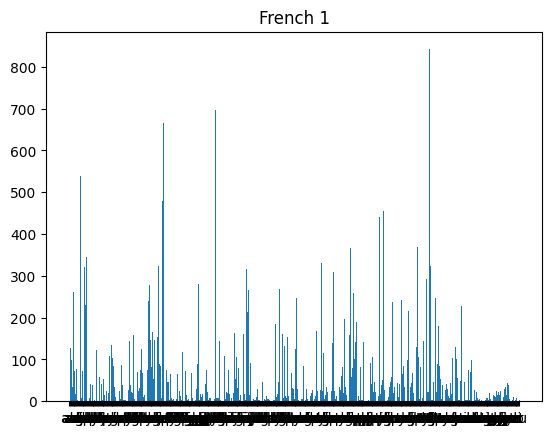

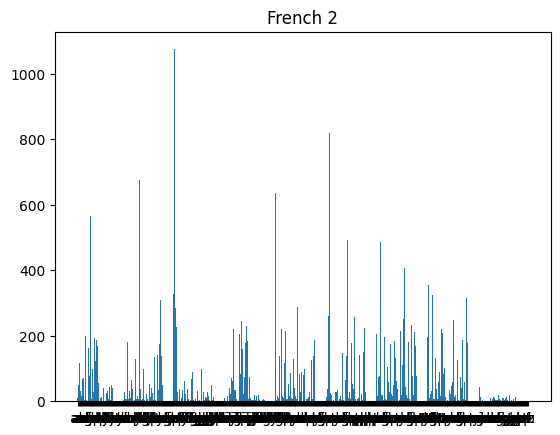

In [88]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [89]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

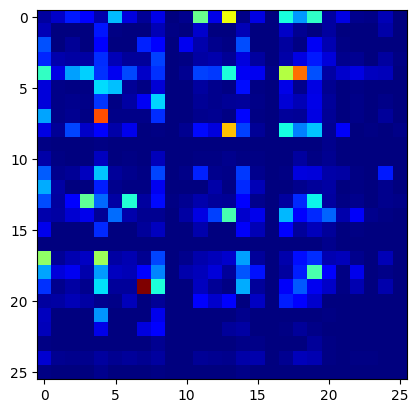

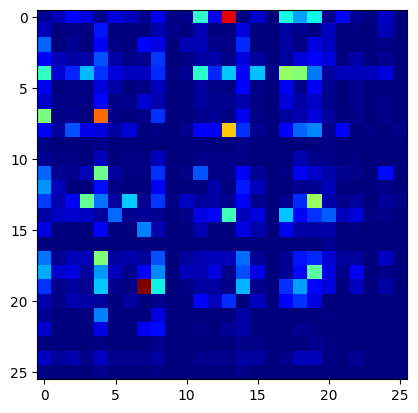

In [90]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

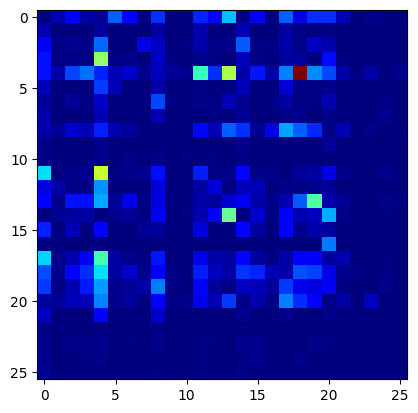

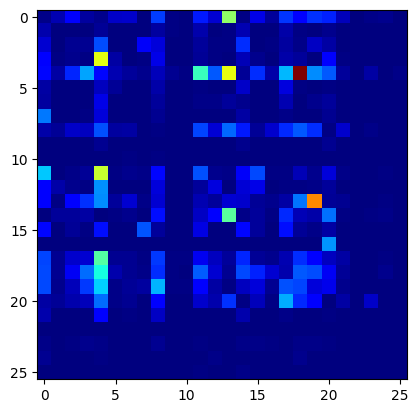

In [91]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [92]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [93]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1123.0
('h', 'e') : 983.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 655.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# ANSWER 1:
Using different languages: Here I am using chinese('zh') and italian('it') to run the same code above.

In [94]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('zh')

chi1 = wikipedia.page(topic1).content
chi2 = wikipedia.page(topic2).content

wikipedia.set_lang('it')

it1 = wikipedia.page(topic1).content
it2 = wikipedia.page(topic2).content

In [95]:
#the chinese text
chi1

"長頸鹿 （學名：Giraffa），又稱麒麟鹿，是哺乳动物偶蹄目下一个属，栖居于非洲，是世界上最高的哺乳动物。通常认为，该属目前仅由一个物种组成，仅存的努比亚长颈鹿（Giraffa camelopardalis）为该物种的模式種，为濒危野生动植物种国际贸易公约附录II所列的保护动物。但若使用不同方法去分析的话，现存的长颈鹿可以细分为一至八个物种不等。此外，人们目前还发现了七种已灭绝的长颈鹿的化石。\n长颈鹿的显著特征有长脖子、长腿、皮骨角，以及它们特有的毛发形态。在生物分类上，它与基因最相近的㺢㹢狓同属长颈鹿科。长颈鹿的分布北起乍得，南达南非，西到尼日尔，东至索马里，常居于疏林草原或是疏林。它们以食用含羞草亚科为主的木本植物的树叶、水果以及花朵为生，其长长的脖子能让它们吃到其他动物够不到的植物。它们也可能成为狮、豹、斑鬣狗和非洲野犬的猎物。长颈鹿是群居动物，带着幼崽的雌鹿和无血缘关系的成年雄鹿都倾向于组成各自的群体，不过它们喜欢社交，有时也会聚到更大的一群里。雄鹿透過脖击（即以脖子为武器的角斗）划分社会等级，当中的优胜者得以与雌鹿交配。雌鹿的唯一责任为养育幼崽。\n长颈鹿以其独特的外观和行为成为了从古至今的各种文化的组成元素，经常出现在绘画、书籍、漫画之中。國際自然保護聯盟认定其为易危物種，在部分地区已经局部地區滅絕。长颈鹿是众多國家公園和主题公园的常客，截至2010年 (2010-Missing required parameter 1=month!)，动物园中的长颈鹿有1,600多头。截至2015年 (2015-Missing required parameter 1=month!)，世界上总共约有97,500头长颈鹿。\n\n\n== 分类 ==\n1758年，卡尔·林奈将现存的长颈鹿根据二名法归入鹿屬 。但摩顿·思伦·布兰尼奇于1772年将其重新分类为长颈鹿属，其种名camelopardalis来源于拉丁语。\n\n\n=== 演化 ===\n长颈鹿是偶蹄目长颈鹿科仅有的两个现存的属中的一个，另一个是㺢㹢狓。长颈鹿科曾经一度分布非常广泛，有超过10个属。他们关系最近的已知的近亲是已经灭绝的类鹿的梯角鹿科 。他们和叉角羚科一样（现仅存的物种只有叉角羚）都从属于长颈鹿总科。这些动物很可能是从已经灭绝的古鹿科演化过来，而古鹿科很可能是鹿科的祖先。长颈鹿脖子的延长可

In [96]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [97]:
chi1 = cleanup(chi1)
chi2 = cleanup(chi2)
it1 = cleanup(it1)
it2 = cleanup(it2)

In [98]:
print(it2)

theelephantmanunfilmbiograficodeldirettodadavidlynchilfilmstatoadattatodailibritheelephantmanandotherreminiscencesdeldottorfredericktrevesetheelephantmanastudyinhumandignitydiashleymontaguilfilmstatobenaccoltoallepocadelladistribuzioneeilsuccessoconsacriprotagonistianthonyhopkinsjohnhurthannahgordonealtrimembridelcasttramanellalondradifineottocentoildeformejosephmerricknelleprimebiografierisulterroneamentechiamatojohnmajosephilnomeautenticovienescopertodaldottorfredericktrevesduranteunospettacolodistradagestitodalsignorbytesmerrickpresentanumerosedeformazioniingranpartedelcorposoprattuttonelcapoperviadellasuasindromediproteotantodaveniresoprannominatoluomoelefantepernonesserederisoquandocamminainmezzoallagentecomunemerrickindossaintestaunsaccobucatocucitoaduncappelloinmodotaledacoprireledeformitdelvisoedelcraniobytessiritieneilproprietariodimerricktantochevuolesserepagatopercederloatrevescheperunbreveperiodoloportaalsuoospedalepermostrarloaicolleghiappenamerrickfaritornodalsuoproprieta

In [99]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

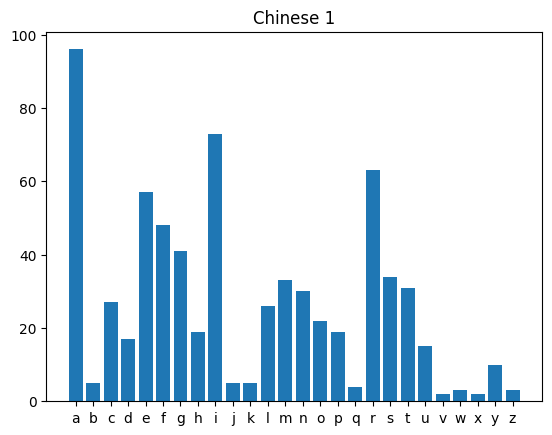

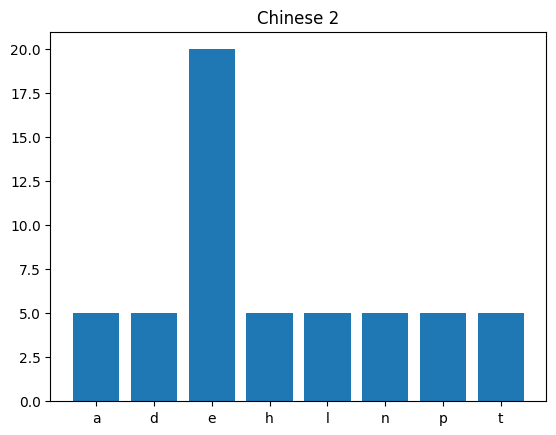

In [100]:
unigram_chi1 = Counter(ngrams(chi1,1))
plothistogram(unigram_chi1)
plt.title('Chinese 1')
plt.show()
unigram_chi2 = Counter(ngrams(chi2,1))
plothistogram(unigram_chi2)
plt.title('Chinese 2')
plt.show()

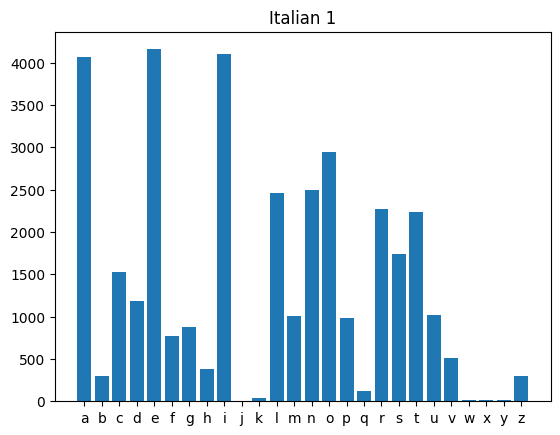

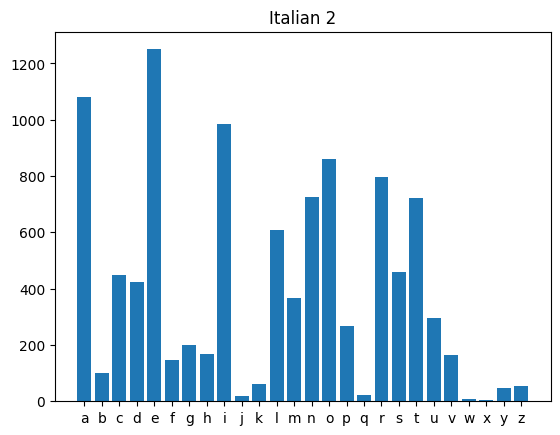

In [101]:
unigram_it1 = Counter(ngrams(it1,1))
plothistogram(unigram_it1)
plt.title('Italian 1')
plt.show()
unigram_it2 = Counter(ngrams(it2,1))
plothistogram(unigram_it2)
plt.title('Italian 2')
plt.show()

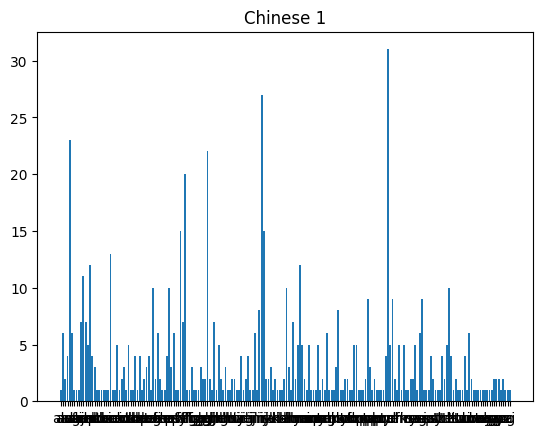

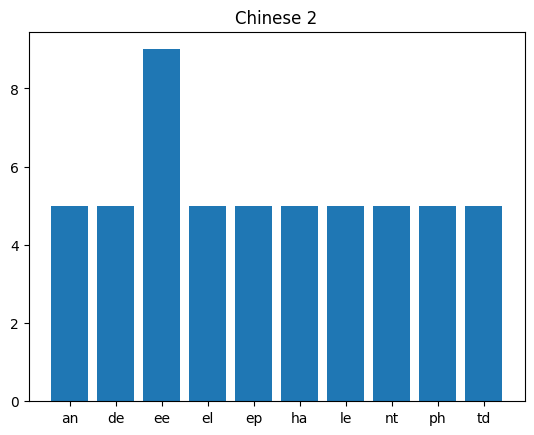

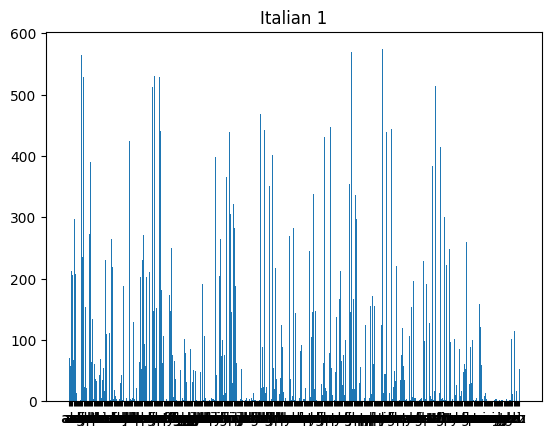

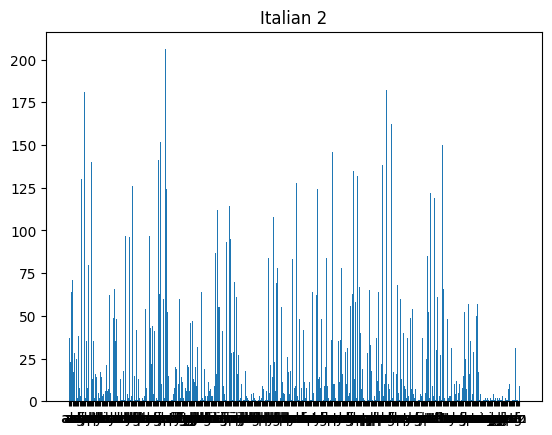

In [102]:
bigram_chi1 = Counter(ngrams(chi1,2)) # bigrams
plothistogram(bigram_chi1)
plt.title('Chinese 1')
plt.show()

bigram_chi2 = Counter(ngrams(chi2,2))
plothistogram(bigram_chi2)
plt.title('Chinese 2')
plt.show()

bigram_it1 = Counter(ngrams(it1,2))
plothistogram(bigram_it1)
plt.title('Italian 1')
plt.show()

bigram_it2 = Counter(ngrams(it2,2))
plothistogram(bigram_it2)
plt.title('Italian 2')
plt.show()

In [103]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

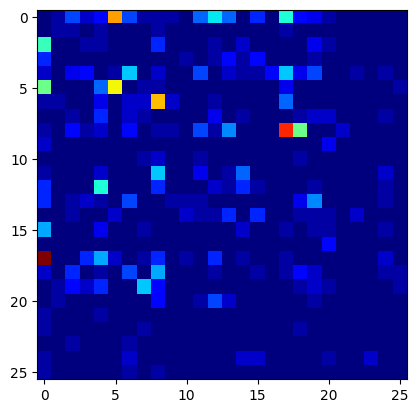

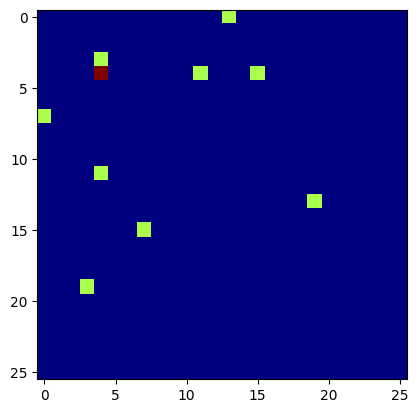

In [104]:
bichi1 = plotbihistogram(bigram_chi1)
plt.show()
bichi2 = plotbihistogram(bigram_chi2)

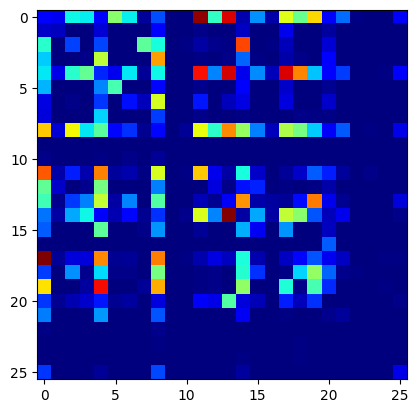

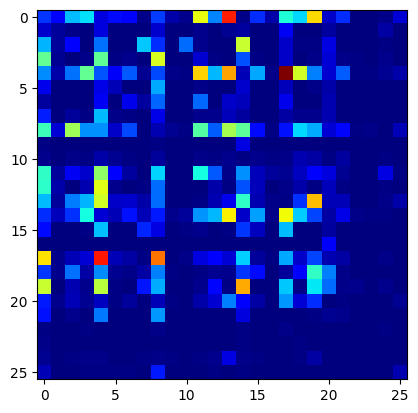

In [105]:
biit1 = plotbihistogram(bigram_it1)
plt.show()
biit2 = plotbihistogram(bigram_it2)

In [106]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [107]:
print('\nChinese 1:')
ShowTopN(bichi1)
print('\nChinese 2:')
ShowTopN(bichi2)
print('\nItalian 1:')
ShowTopN(biit1)
print('\nItalian 2:')
ShowTopN(biit2)


Chinese 1:
('r', 'a') : 31.0
('i', 'r') : 27.0
('a', 'f') : 23.0
('g', 'i') : 22.0
('f', 'f') : 20.0
('i', 's') : 15.0
('f', 'a') : 15.0
('c', 'a') : 13.0
('m', 'e') : 12.0
('a', 'r') : 12.0

Chinese 2:
('e', 'e') : 9.0
('l', 'e') : 5.0
('d', 'e') : 5.0
('h', 'a') : 5.0
('t', 'd') : 5.0
('e', 'p') : 5.0
('e', 'l') : 5.0
('n', 't') : 5.0
('a', 'n') : 5.0
('p', 'h') : 5.0

Italian 1:
('r', 'a') : 574.0
('o', 'n') : 570.0
('a', 'l') : 565.0
('e', 'n') : 531.0
('e', 'r') : 528.0
('a', 'n') : 528.0
('t', 'e') : 514.0
('e', 'l') : 512.0
('c', 'o') : 478.0
('l', 'a') : 468.0

Italian 2:
('e', 'r') : 206.0
('r', 'e') : 182.0
('a', 'n') : 181.0
('r', 'i') : 162.0
('e', 'n') : 152.0
('t', 'o') : 150.0
('n', 't') : 146.0
('e', 'l') : 141.0
('a', 't') : 140.0
('r', 'a') : 138.0


# ANSWER 2:
Here I will be using two completely different topics, i.e., 'pink' and 'exam'.

My two languages will be 'english' and 'french'.

The other data source that I will be using in place of Wikipedia here is an own text in the form of string.

The remaining code remains the same, though the outputs obtained are different due to different inputs.

In [108]:
#here I am using own document(which will be a string) as a source. I will define
#the document here itself in the code snippet for easy understanding.

#my two topics will be pink and exam. And my two languages are english and french.
#eng1 and fr1 are about PINK while eng2 and fr2 are about EXAM.

eng1="Pink is a nurturing, playful, and nostalgic color that takes people back to their childhoods. That said, pink is a color of opposites since it can make us think of both innocence and burning passion."
eng2="Exams are the way to test our knowledge. Without conducting the exams and test students don't concentrate in their studies and learn their lessons properly. Exams are necessary in schools and colleges to find out the real skills, talents and knowledge of the students."

fr1="Le rose est la couleur la plus souvent associée au charme, à la politesse, à la sensibilité, à la tendresse, à la douceur, à l'enfance, à la féminité et au romantisme. Une combinaison de rose et de blanc est associée à la chasteté"
fr2="L’examen est un moyen systématique d’évaluer et d’analyser l’acquisition de compétences et de connaissances par une personne. Dans l'enseignement des langues, par exemple, il existe diverses formes d'évaluation telles que des dissertations, des examens oraux, des présentations et des examens de classement."


In [109]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [110]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [111]:
print(eng1)

pinkisanurturingplayfulandnostalgiccolorthattakespeoplebacktotheirchildhoodsthatsaidpinkisacolorofoppositessinceitcanmakeusthinkofbothinnocenceandburningpassion


In [112]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

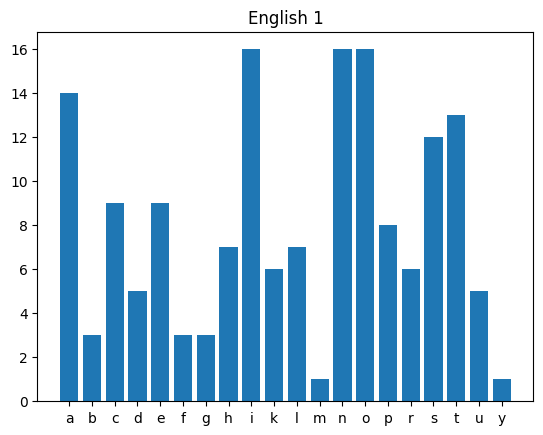

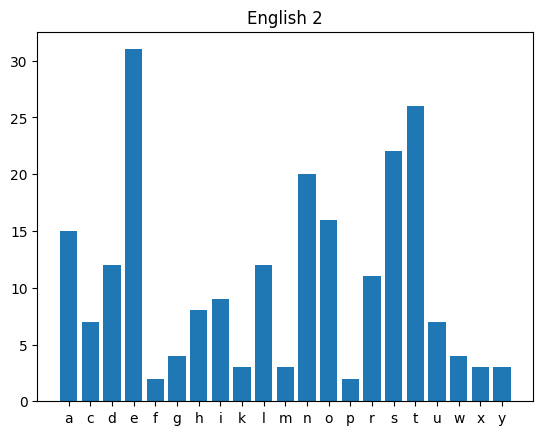

In [113]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

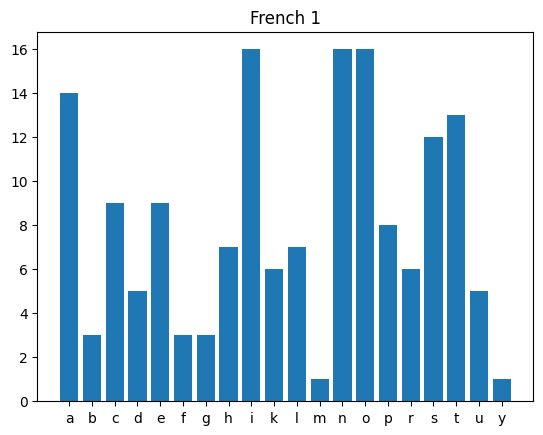

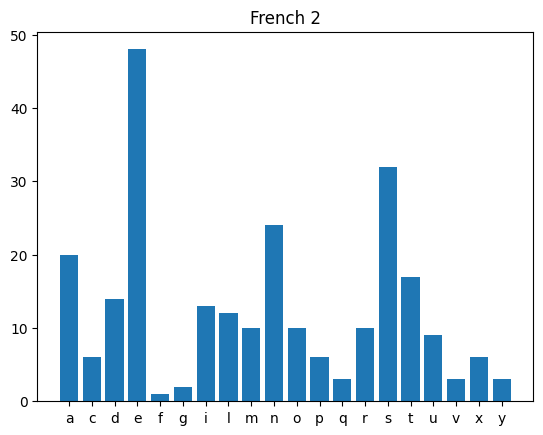

In [114]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

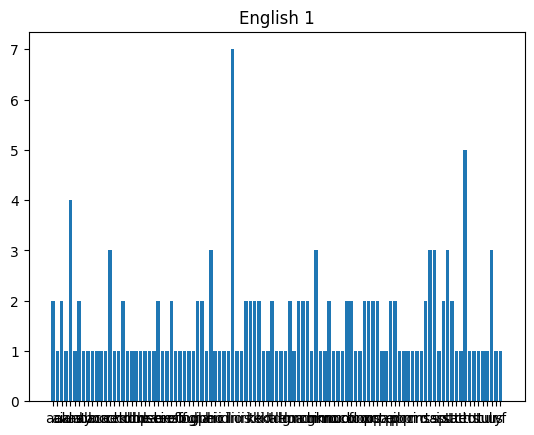

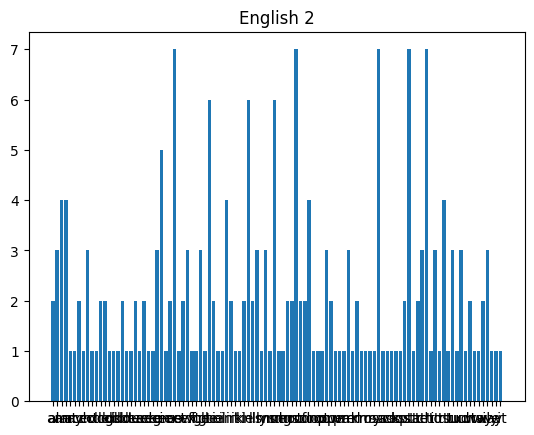

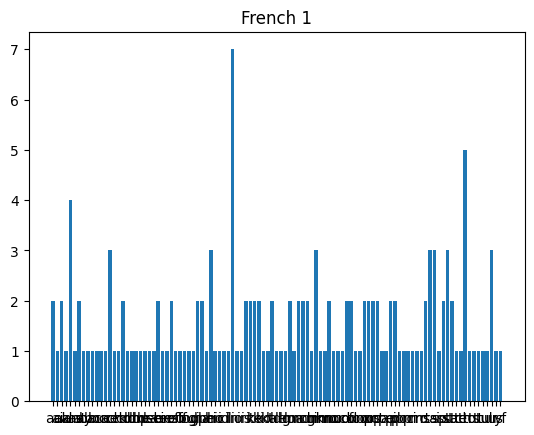

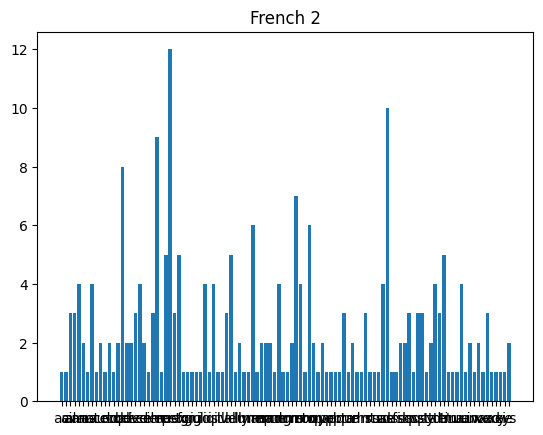

In [115]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

In [116]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

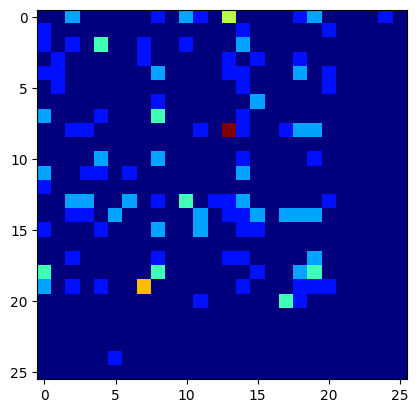

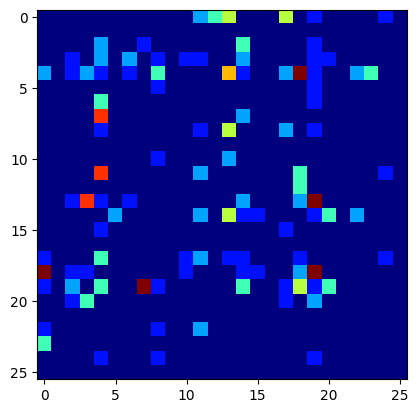

In [117]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

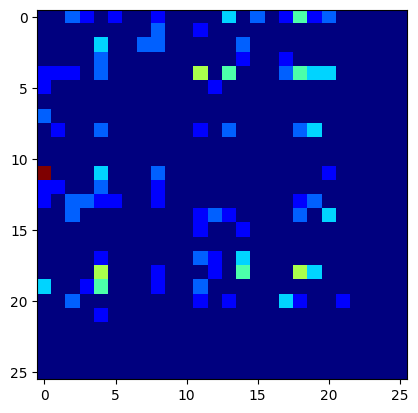

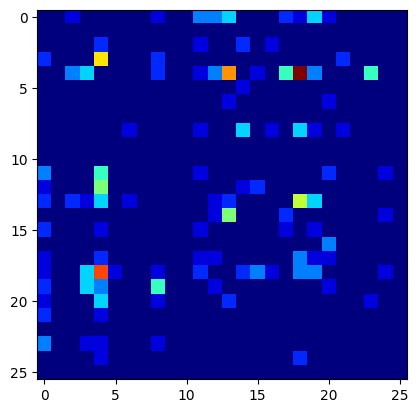

In [118]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

In [119]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [120]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('i', 'n') : 7.0
('t', 'h') : 5.0
('a', 'n') : 4.0
('s', 'a') : 3.0
('n', 'k') : 3.0
('s', 't') : 3.0
('c', 'e') : 3.0
('u', 'r') : 3.0
('s', 'i') : 3.0
('h', 'i') : 3.0

English 2:
('e', 's') : 7.0
('s', 'a') : 7.0
('t', 'h') : 7.0
('s', 't') : 7.0
('n', 't') : 7.0
('l', 'e') : 6.0
('h', 'e') : 6.0
('n', 'd') : 6.0
('e', 'n') : 5.0
('i', 'n') : 4.0

French 1:
('l', 'a') : 9.0
('s', 's') : 5.0
('s', 'e') : 5.0
('e', 'l') : 5.0
('s', 'o') : 4.0
('a', 's') : 4.0
('e', 's') : 4.0
('e', 'n') : 4.0
('t', 'e') : 4.0
('s', 't') : 3.0

French 2:
('e', 's') : 12.0
('s', 'e') : 10.0
('e', 'n') : 9.0
('d', 'e') : 8.0
('n', 's') : 7.0
('o', 'n') : 6.0
('m', 'e') : 6.0
('e', 'r') : 5.0
('e', 'x') : 5.0
('l', 'e') : 5.0


# ANSWER 3:
To generate trigrams or higher n-grams, we use NLTK's ngrams function.

For example, for a trigram we say ngram(tokens,3) and for n-grams we replace 3 wiht the value of 'n'.

To visualize the trigrams or higher n-grams, we can create various types of plots and graphs like Bar Chart, Word Cloud, Heatmap, Network Graph.

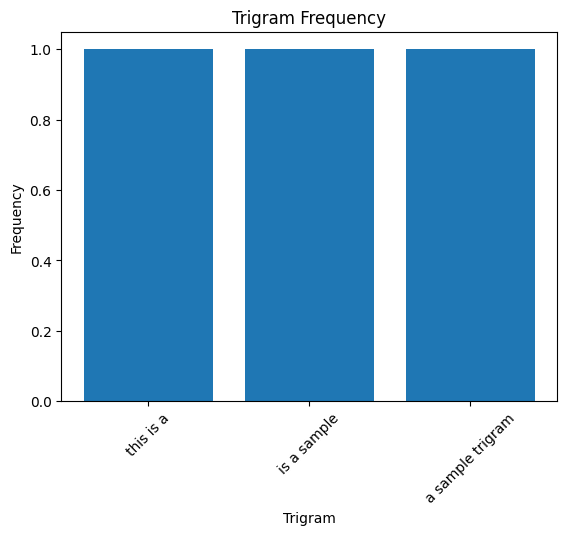

In [121]:
#below is simple example code using trigrams and visualizing them with bar graph

import matplotlib.pyplot as plt
from collections import Counter

# Sample trigrams
trigrams = [("this", "is", "a"), ("is", "a", "sample"), ("a", "sample", "trigram")]

trigram_counts = Counter(trigrams)
trigram, count = zip(*trigram_counts.items())
trigram = [' '.join(t) for t in trigram]

plt.bar(trigram, count)
plt.xlabel("Trigram")
plt.ylabel("Frequency")
plt.title("Trigram Frequency")
plt.xticks(rotation=45)
plt.show()


# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [124]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

**Extract** a subset of the data for our experiment:

In [125]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

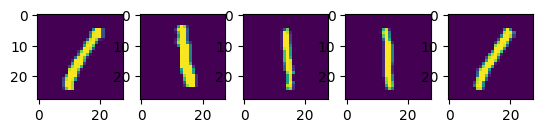

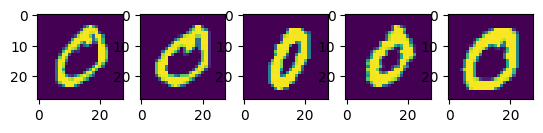

In [126]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [127]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

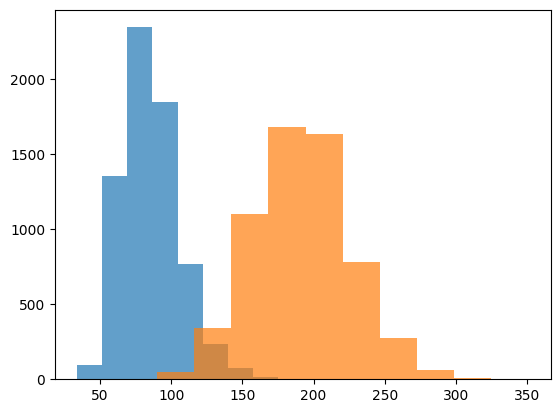

In [128]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [129]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

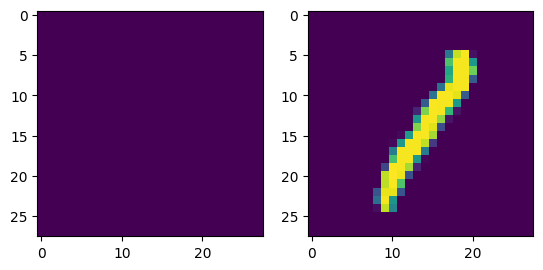

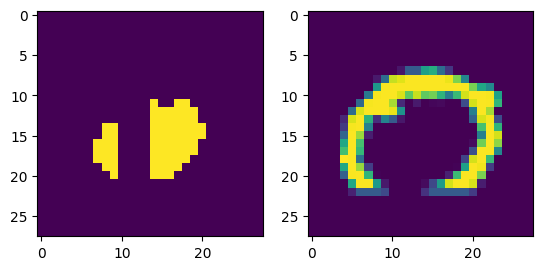

In [130]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

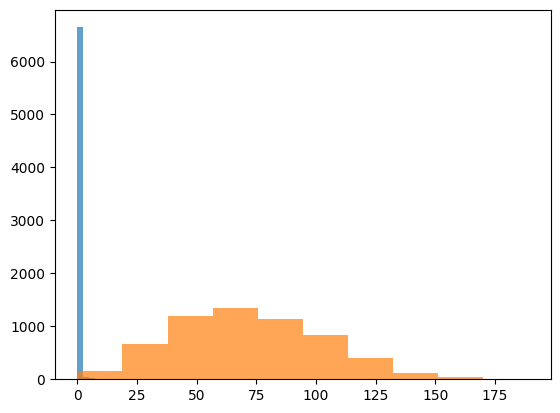

In [131]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [132]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

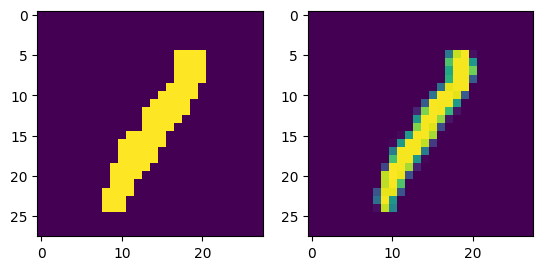

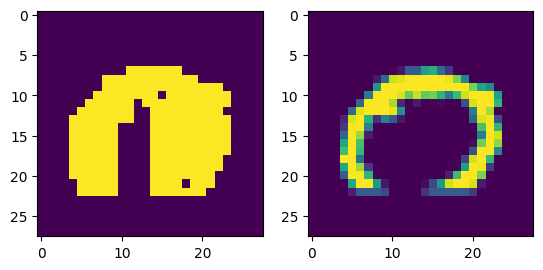

In [133]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

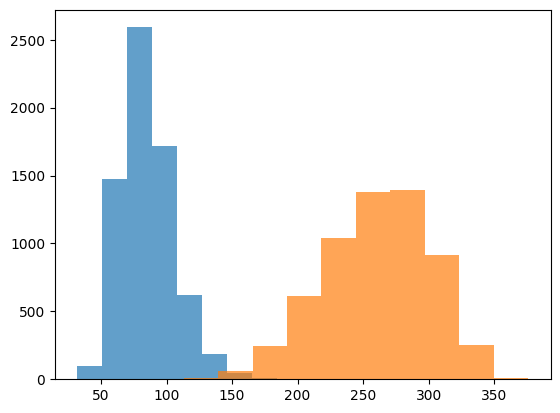

In [134]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [135]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

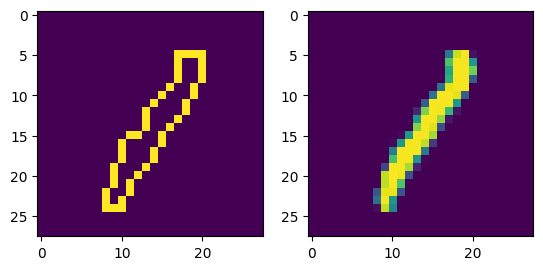

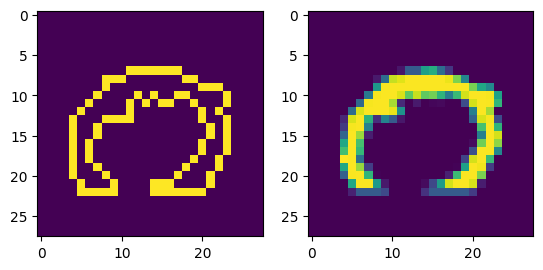

In [136]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

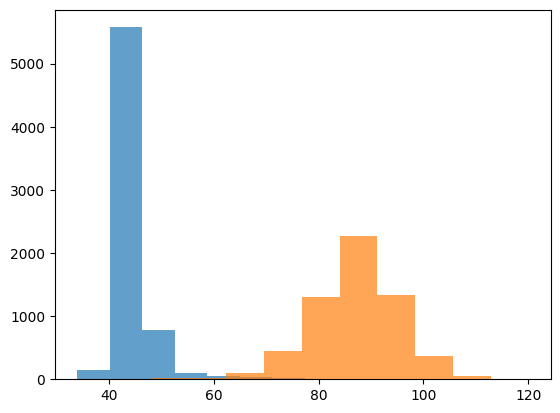

In [137]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

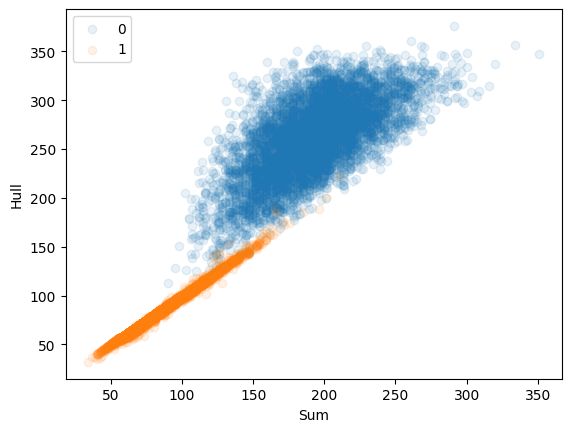

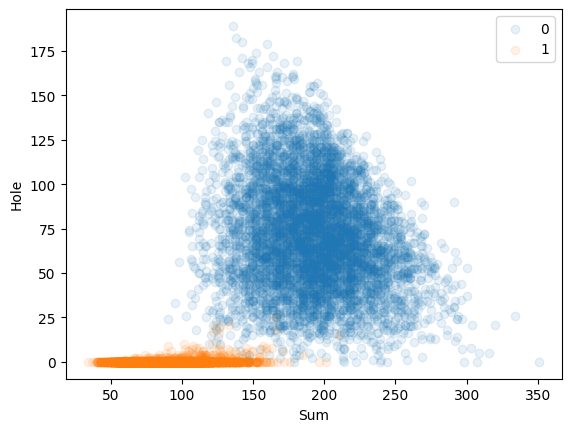

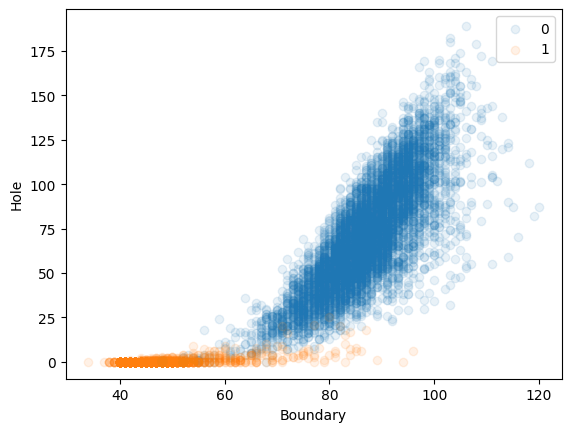

In [138]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [139]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

# **ANSWERS:**


###1.
Using all the three features(sum,hole,boundary) gives us the best combination of features as the plot gives us an accurate representation of both the classes.
###2.
To test and visualize 4 or more features we can use the following methods:

Pairwise Scatter Plots, 3D Scatter Plots, Parallel Coordinates Plot, Feature Importance Ranking, Dimensionality Reduction, Heatmaps and Correlation Analysis and Multivariate Analysis Tools.

###3.
Some of my own features are:

**Aspect Ratio:** The ratio of its width to its height. '0' and '1' often have different aspect ratios.

**Area of the Digit:** The total area occupied by the digit within the image. This can be used as a feature since '0' and '1' may have different areas.

**Density of Black Pixels:** The ratio of the number of black pixels to the total number of pixels in the image. '0' and '1' may have different black pixel densities.

**Symmetry:** Measure the degree of symmetry of the digit. '0' is usually more symmetric compared to '1', which has an asymmetric top.

###4.
The features extracted in this code work only for 0 and 1. They may not work as effectively for distinguishing other digits without further analysis and adaptation.
To use the model on classes other than 0 and 1, we might need to retrain the model with modified or new features.

###5.
The complexity increases if we take more than 2 classes.
We can use techniques such as one-vs-all (OvA) classification, one-vs-one (OvO) classification, or multi-class classification algorithms like multinomial logistic regression or support vector machines.

Since the complexity increases with the increase in number of classes, we might need advances visualization techniques like multi-dimensional scaling(MDS) or parallel coordinate plots.